# Week 10 Tutorial: Data Wrangling in Python

POP77001 Computer Programming for Social Scientists

## Loading the Dataset

-   Replace filepath with the location of the file on your computer

In [1]:
import pandas as pd

. . .

In [2]:
# This time let's skip the 2nd row, which contains questions
PATH = '../data/kaggle_survey_2022_responses.csv'

kaggle2022 = pd.read_csv(PATH, skiprows = [1])
kaggle2022.head(n = 1)

/tmp/ipykernel_768716/1226030701.py:4: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  kaggle2022 = pd.read_csv(PATH, skiprows = [1])

1 rows × 296 columns

. . .

In [3]:
# We will load the questions as a separate dataset
kaggle2022_qs = pd.read_csv(PATH, nrows = 1)
kaggle2022_qs

1 rows × 296 columns

## Exercise: Categorical Variables

-   Load the dataset (as local file)
-   Consider country of residence reported by respondents (question Q4).
-   Make sure you can select the column both using label and index.
-   Calculate the percentages of top 3 countries of residence in the
    sample.

## Crosstabulation in `pandas`

In [4]:
# Calculate crosstabulation between 'Age group' (Q2) and 'Gender' (Q3)
pd.crosstab(kaggle2022['Q2'], kaggle2022['Q3'])

## Margins in Crosstab

In [5]:
# It is often useful to see the proportions/percentages rather than raw counts
pd.crosstab(kaggle2022['Q2'], kaggle2022['Q3'], normalize = 'columns')

## Crosstab with `pivot_table`

In [6]:
# For `values` variable we use `Q4`, but any other would work equally well 
pd.pivot_table(
  kaggle2022,
  index = 'Q2',
  columns = 'Q3',
  values = 'Q4',
  aggfunc = 'count',
  fill_value = 0
)

## Exercise: Manipulating Columns

-   Let’s take a look at the first column of the dataset.
-   It lists the time it took respondents to complete the survey (in
    seconds).
-   First, change column’s long name to `duration_min`.
-   Now modify the column such that it shows time in minutes.
-   Filter dataset leaving only respondents who took more than 3 mins to
    respond.
-   How many are dropped?

## Pivoting Data in `pandas`

-   Recall pivoting from R.
-   The two main operations are:
    -   Spreading some variable across columns (`pd.DataFrame.pivot()`)
    -   Gathering some columns in a variable pair
        (`pd.DataFrame.melt()`)

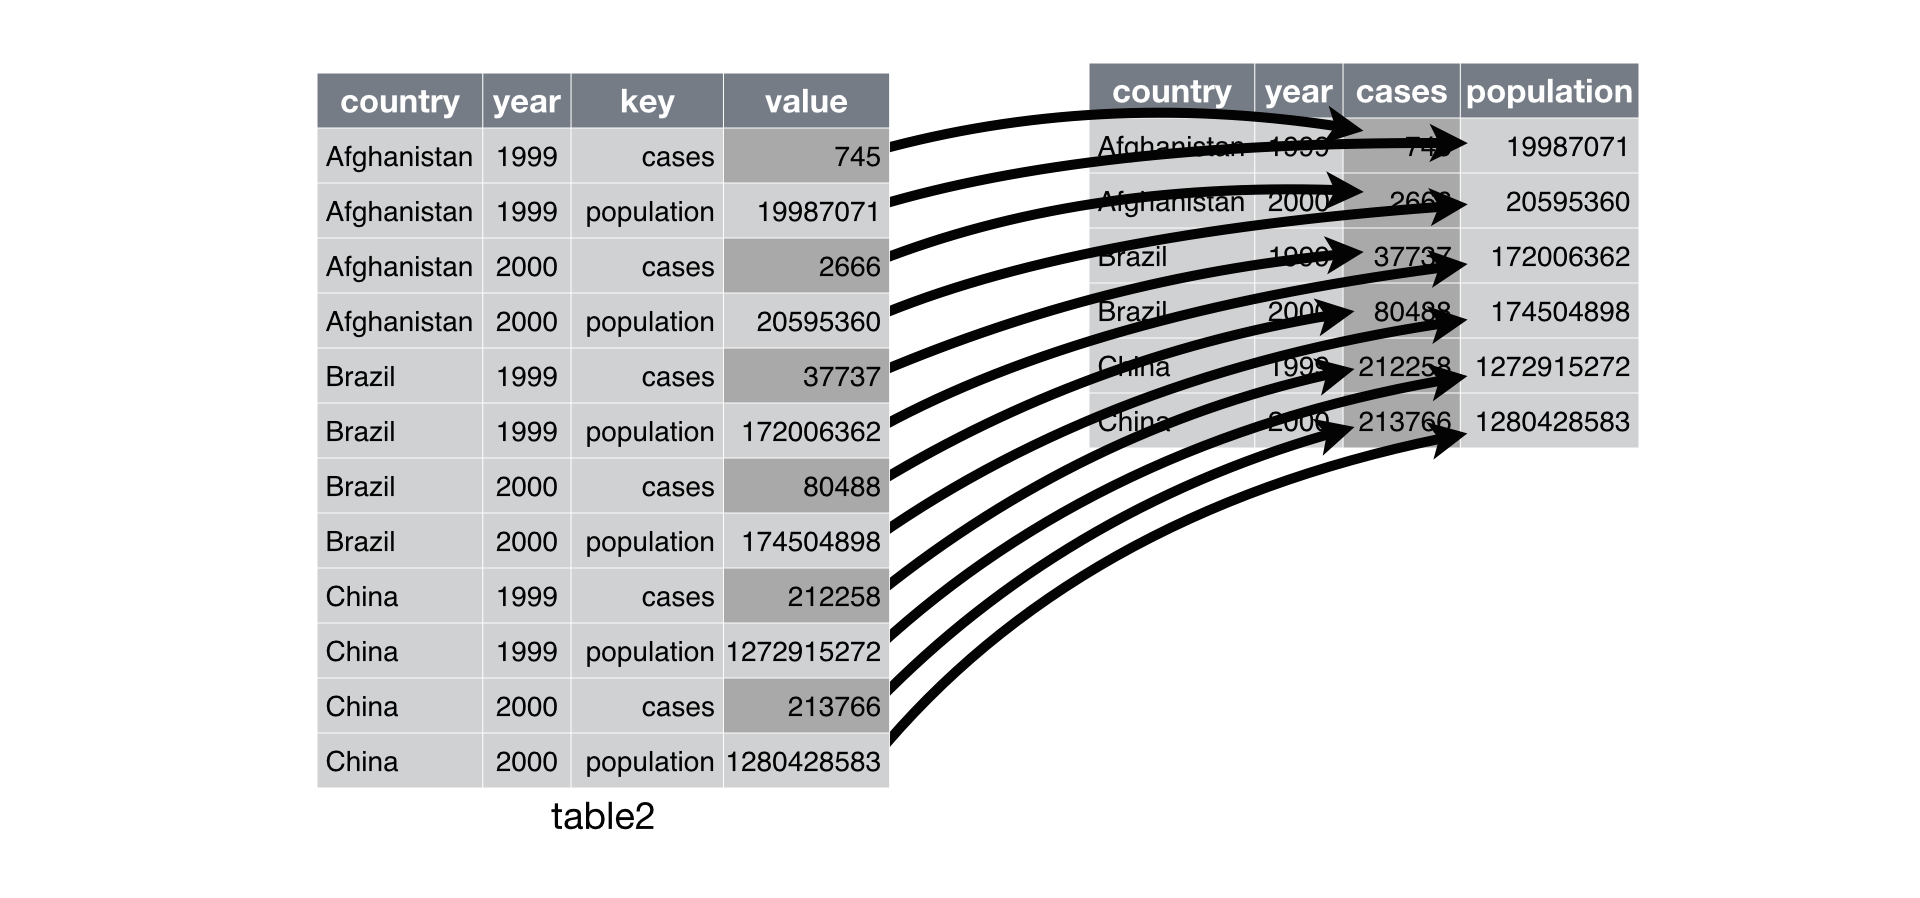 pd.DataFrame.pivot()

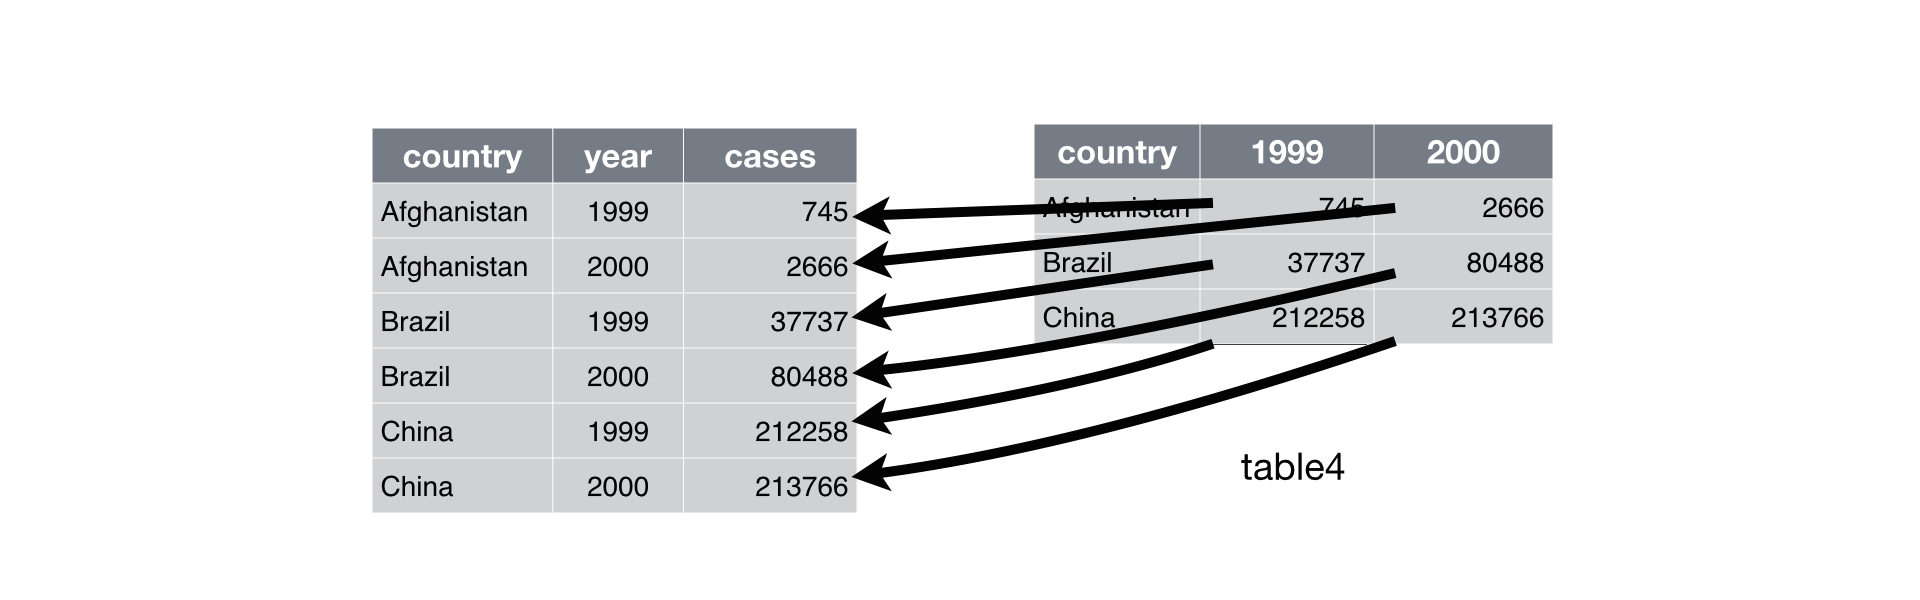 pd.DataFrame.melt()

> **Source**
>
> [R for Data
> Science](https://r4ds.had.co.nz/tidy-data.html?q=pivot#pivoting)

## Pivoting Data to Long

In [7]:
df_wide = pd.DataFrame({
  'country': ['Afghanistan', 'Brazil'],
  '1999': [745, 2666],
  '2000': [37737, 80488]
})
df_wide

. . .

In [8]:
# Pivoting longer
df_long = df_wide.melt(
    id_vars = 'country',
    var_name = 'year',
    value_name = 'cases'
)
df_long

## Pivoting Data to Wide

In [9]:
# Pivoting wider
df_wide = df_long.pivot(
    index = 'country',
    columns = 'year',
    values = 'cases'
)
df_wide

. . .

In [10]:
# As using pivot creates an index from
# the column used as the row labels, we
# may want to use reset_index to move 
# the data back into a column
df_wide.reset_index()

## Week 10 Exercise (unassessed)

-   Try replicating Exercise 5 from Assignment 2 using `pandas`.
-   You can use `pd.DataFrame.isna()` or `pd.DataFrame.notna()` for
    filtering.